In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import warnings
warnings.filterwarnings('ignore')

In [99]:
movies_df=pd.read_csv("E:\\movies\\movies_metadata.csv")
ratings_df=pd.read_csv("E:\\movies\\ratings_small.csv")
key_df=pd.read_csv("E:\\movies\\keywords.csv")

In [100]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [101]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [102]:
key_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [103]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [104]:
movies_df.drop(columns=['belongs_to_collection','homepage','tagline'],axis=1,inplace=True)

In [105]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [106]:
key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [107]:
pd.set_option('display.max_columns',500)

# Check for null values

In [108]:
movies_null=(movies_df.isnull().sum()/len(movies_df))*100
movies_null

adult                   0.000000
budget                  0.000000
genres                  0.000000
id                      0.000000
imdb_id                 0.037391
original_language       0.024194
original_title          0.000000
overview                2.098271
popularity              0.010997
poster_path             0.848986
production_companies    0.006598
production_countries    0.006598
release_date            0.191352
revenue                 0.013197
runtime                 0.578454
spoken_languages        0.013197
status                  0.191352
title                   0.013197
video                   0.013197
vote_average            0.013197
vote_count              0.013197
dtype: float64

In [109]:
top_10_language=movies_df['original_language'].value_counts().nlargest(10)
top_10_language

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

<AxesSubplot:xlabel='original_language', ylabel='count'>

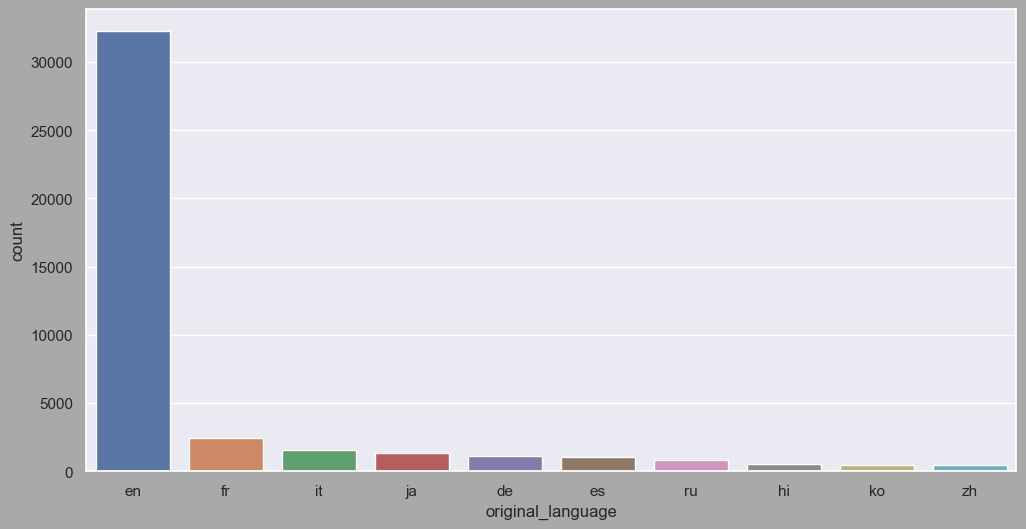

In [110]:
plt.figure(figsize=(12,6),facecolor='darkgray')
sns.countplot(data=movies_df,x='original_language',order=top_10_language.index)

# As we can see that most of the movies are made in english

In [111]:
adult_movies=movies_df['adult'].value_counts().nlargest(2)
adult_movies

False    45454
True         9
Name: adult, dtype: int64

<AxesSubplot:xlabel='adult', ylabel='count'>

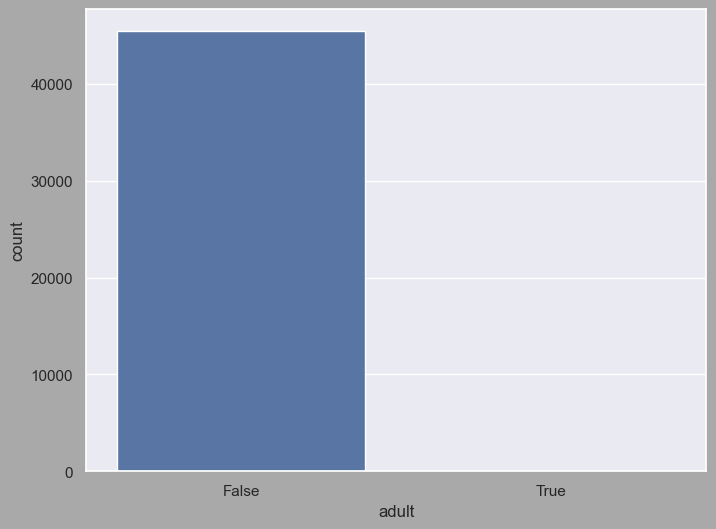

In [112]:
plt.figure(figsize=(8,6),facecolor='darkgray')
sns.countplot(data=movies_df,x='adult',order=adult_movies.index)

# Almost movies are not adulteray

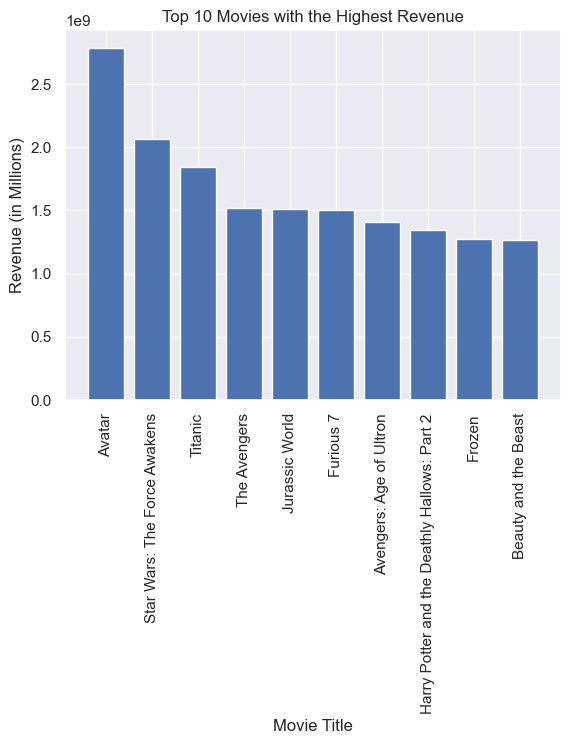

In [113]:
revenue=movies_df.nlargest(10,'revenue')
plt.bar(x=revenue['original_title'], height=revenue['revenue'])

# Add labels and title to the plot
plt.xlabel('Movie Title')
plt.ylabel('Revenue (in Millions)')
plt.title('Top 10 Movies with the Highest Revenue')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Avatar is most collected among the movies

In [114]:
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

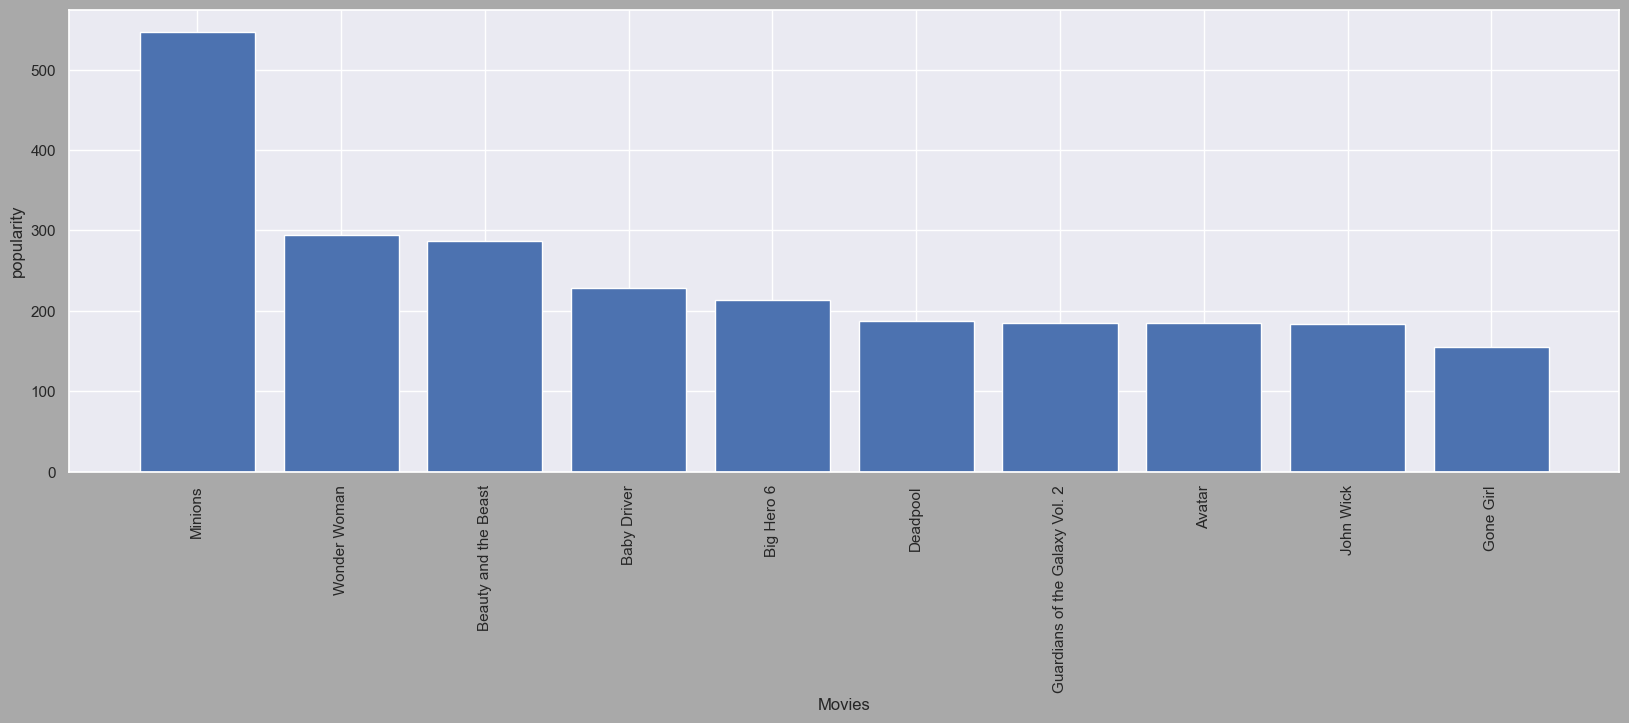

In [115]:
popularity=movies_df.nlargest(10,'popularity')
fig=plt.figure(figsize=(20,6),facecolor='darkgray')
fig,plt.bar(x=popularity['original_title'], height=popularity['popularity'])
plt.xlabel('Movies')
plt.ylabel('popularity')
plt.xticks(rotation=90)
plt.show()

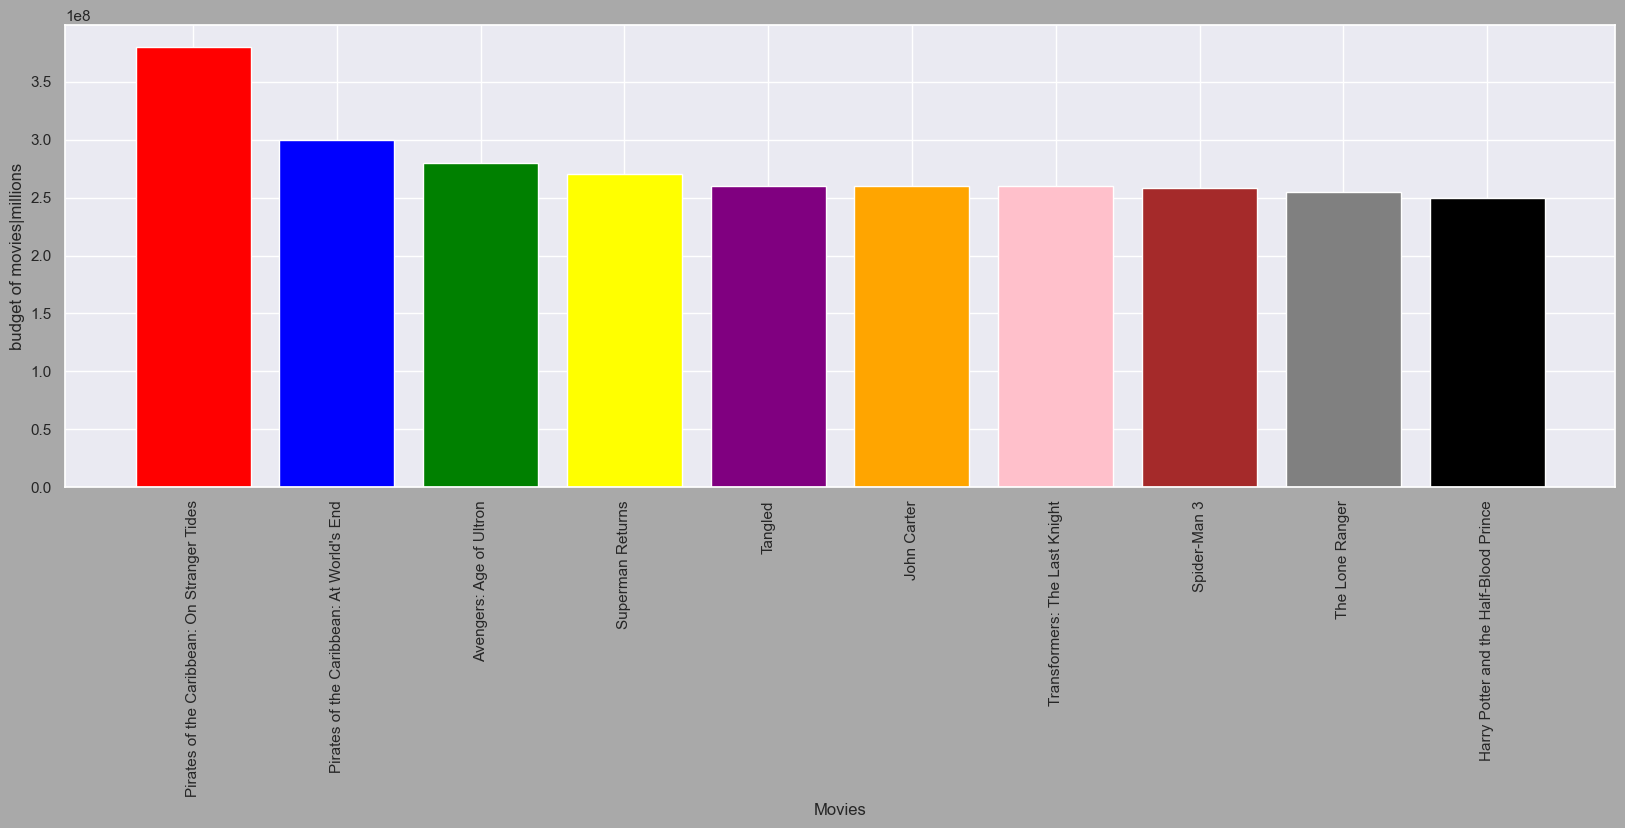

In [116]:
budget=movies_df.nlargest(10,'budget')
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'black']
fig=plt.figure(figsize=(20,6),facecolor='darkgray')
fig,plt.bar(x=budget['original_title'], height=budget['budget'],color=colors)
plt.xlabel('Movies')
plt.ylabel('budget of movies|millions')
plt.xticks(rotation=90)
plt.show()

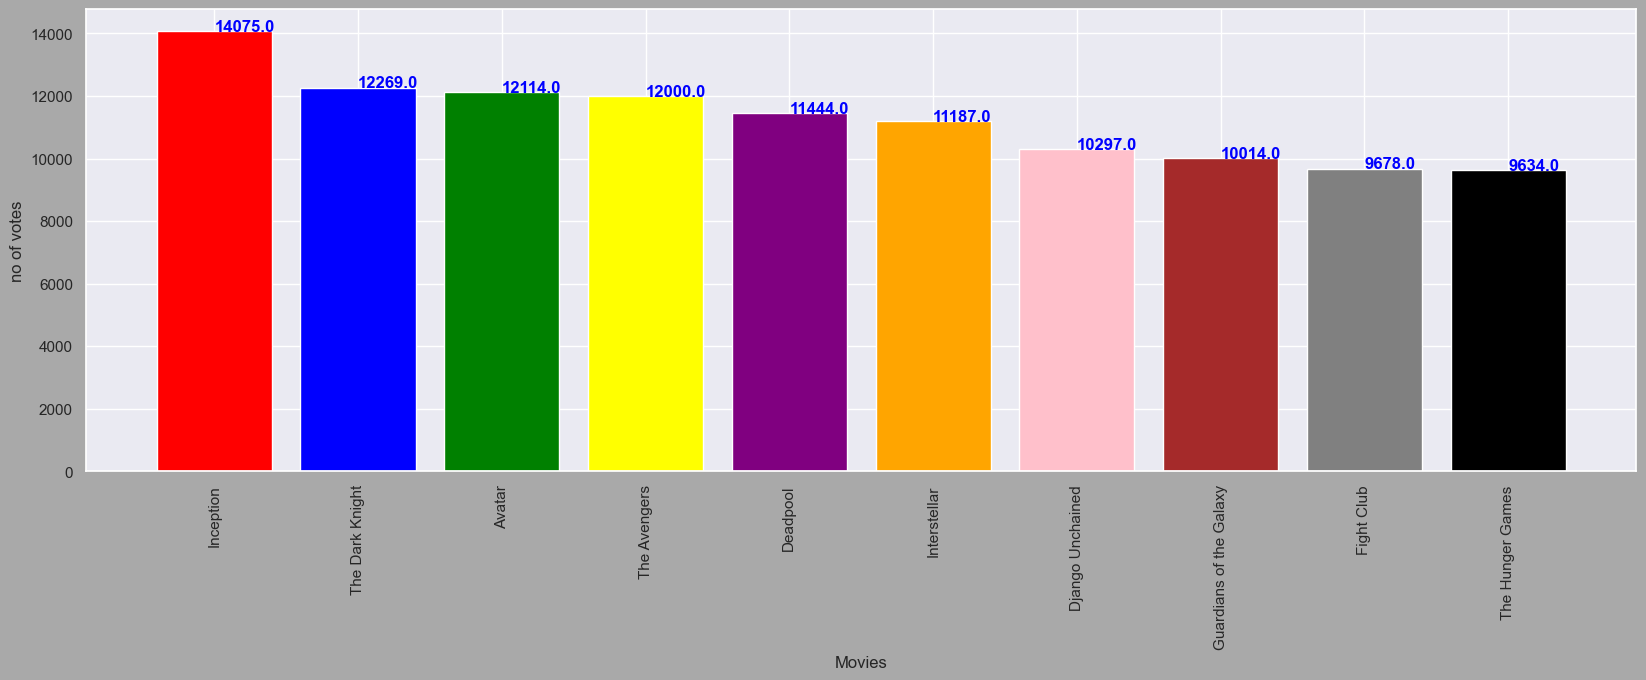

In [117]:
voting=movies_df.nlargest(10,'vote_count')
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'black']
fig=plt.figure(figsize=(20,6),facecolor='darkgray')
fig,plt.bar(x=voting['original_title'], height=voting['vote_count'],color=colors)
plt.xlabel('Movies')
plt.ylabel('no of votes')
plt.xticks(rotation=90)
for i, v in enumerate(voting['vote_count']):
    plt.text(i, v, str(v), color='blue', fontweight='bold')
plt.show()

# Inception has most no of votes

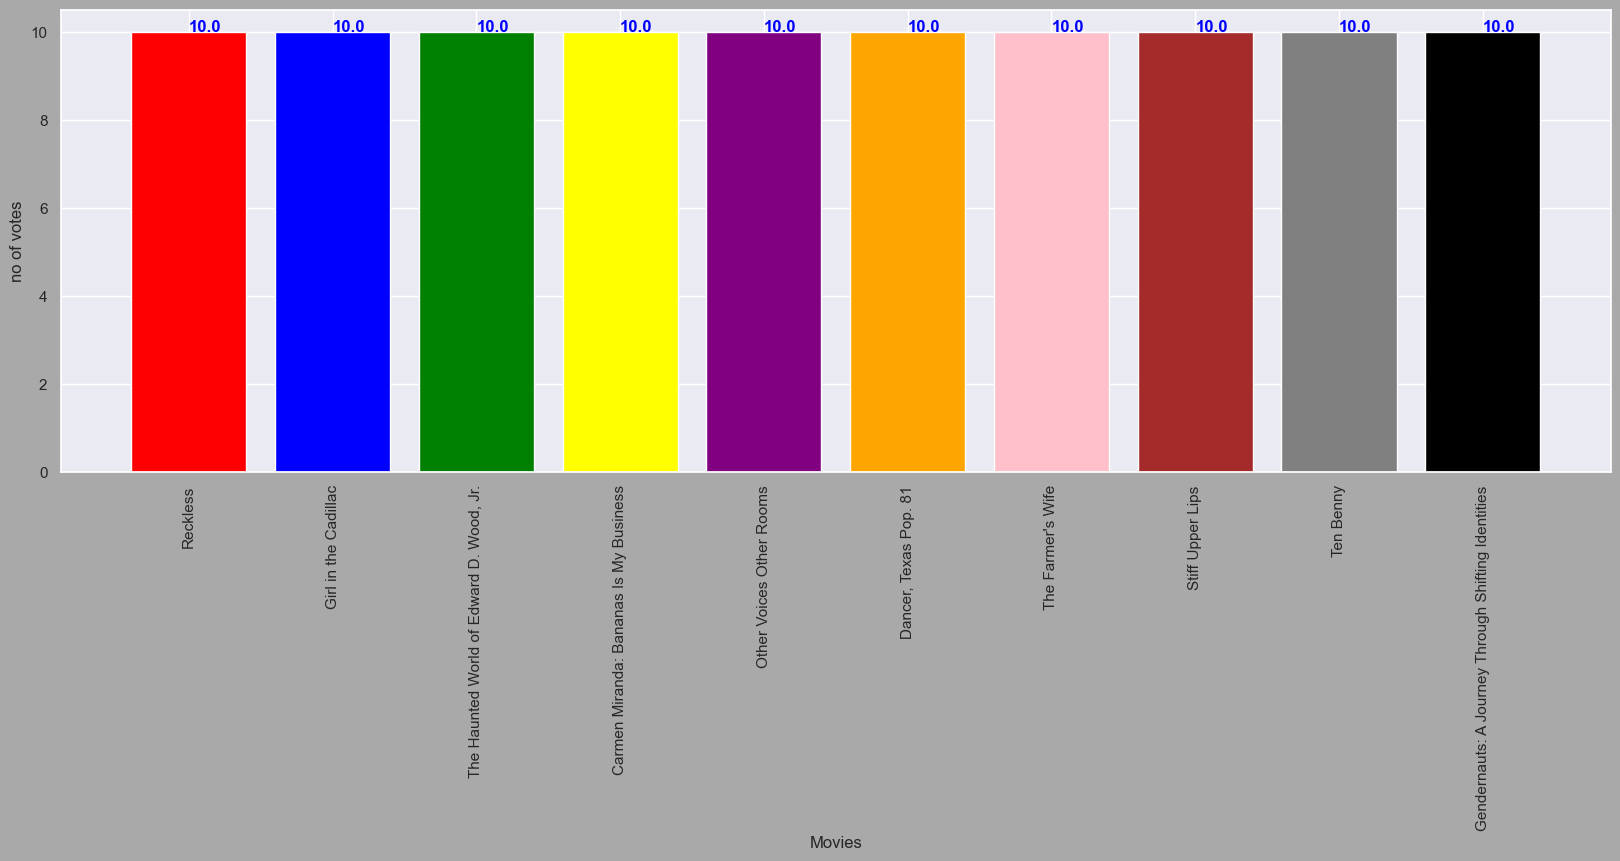

In [118]:
voting_avg=movies_df.nlargest(10,'vote_average')
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'black']
fig=plt.figure(figsize=(20,6),facecolor='darkgray')
fig,plt.bar(x=voting_avg['original_title'], height=voting_avg['vote_average'],color=colors)
plt.xlabel('Movies')
plt.ylabel('no of votes')
plt.xticks(rotation=90)
for i, v in enumerate(voting_avg['vote_average']):
    plt.text(i, v, str(v), color='blue', fontweight='bold')
plt.show()

In [119]:
movies_df['release_date']=pd.to_datetime(movies_df['release_date'],errors='coerce')

In [120]:
movies_df['Year']=movies_df['release_date'].dt.year

In [121]:
year_df=movies_df.groupby('original_title')['Year'].count()
year_df.nlargest(10)

original_title
Alice in Wonderland     8
Hamlet                  8
A Christmas Carol       7
Cinderella              7
Les Misérables          7
Macbeth                 7
The Three Musketeers    7
Blackout                6
Frankenstein            6
Heidi                   6
Name: Year, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Year'>

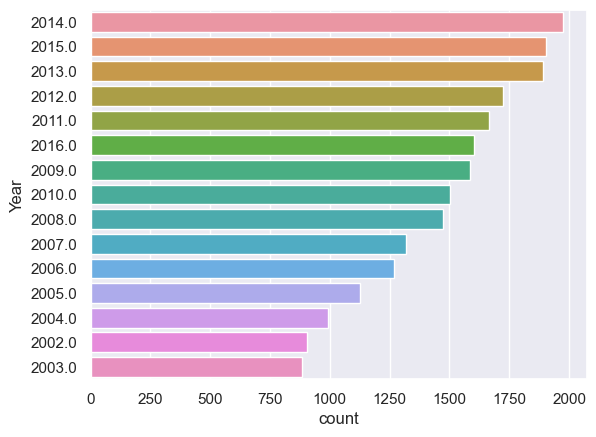

In [122]:
sns.set(style="darkgrid")
sns.countplot(data=movies_df,y=movies_df['Year'],order=movies_df['Year'].value_counts().index[0:15])

# Most no of movies are released in year 2014

# null imputation

In [123]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45466 non-null  object        
 1   budget                45463 non-null  float64       
 2   genres                45466 non-null  object        
 3   id                    45466 non-null  object        
 4   imdb_id               45449 non-null  object        
 5   original_language     45455 non-null  object        
 6   original_title        45466 non-null  object        
 7   overview              44512 non-null  object        
 8   popularity            45460 non-null  float64       
 9   poster_path           45080 non-null  object        
 10  production_companies  45463 non-null  object        
 11  production_countries  45463 non-null  object        
 12  release_date          45376 non-null  datetime64[ns]
 13  revenue         

# Null imputation on budget,popularity,vote average,vote count 

In [124]:
movies_df['budget']=movies_df['budget'].fillna(movies_df['budget'].mean())
movies_df['popularity']=movies_df['popularity'].fillna(movies_df['popularity'].mean())
movies_df['vote_average']=movies_df['vote_average'].fillna(movies_df['vote_average'].mean())
movies_df['vote_count']=movies_df['budget'].fillna(movies_df['vote_count'].mean())

In [125]:
import statistics

In [126]:
year_mode=statistics.mode(movies_df['Year'])
movies_df['Year']=movies_df['Year'].fillna(year_mode)

In [127]:
movies_df.dropna()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,Year
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,30000000.0,1995.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,65000000.0,1995.0
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,0.0,1995.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,16000000.0,1995.0
4,False,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,0.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,False,5.7,0.0,1991.0
45462,False,0.0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,0.0,2011.0
45463,False,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,0.0,2003.0
45464,False,0.0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0,1917.0


In [128]:
movies_df.dropna(inplace=True)

In [129]:
import ast

In [130]:
movies_df['production_companies'] = movies_df['production_companies'].apply(lambda x: ast.literal_eval(x))
movies_df['Production_Company_Names'] = movies_df['production_companies'].apply(lambda x: [i['name'] for i in x])

# Production_companies

In [131]:
production_companies = []
for row in movies_df['production_companies']:
    for company in row:
        production_companies.append(company['name'])

<AxesSubplot:>

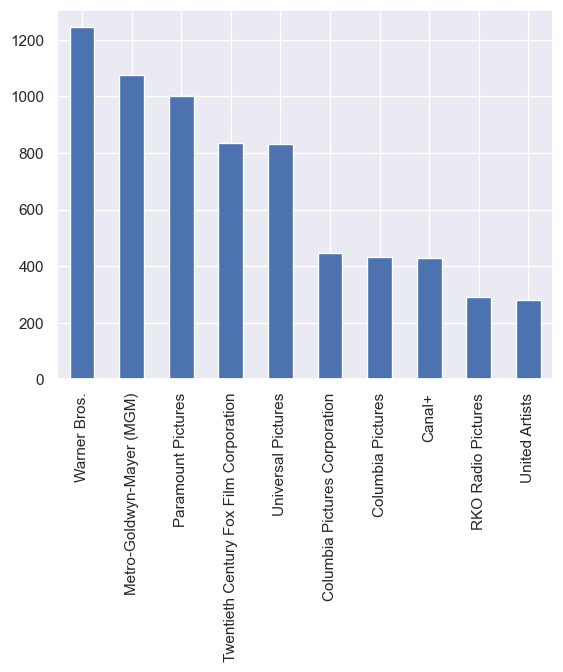

In [132]:
company=pd.Series(production_companies).value_counts()
top_10c=company.head(10)
top_10c.plot(kind='bar')

# warner bros has produced most no of movies

# Production_countries

In [133]:
movies_df['production_countries']=movies_df['production_countries'].apply(lambda x:ast.literal_eval(x))
movies_df['production_countries_new']=movies_df['production_countries'].apply(lambda x:[i['name'] for i in x])

<AxesSubplot:>

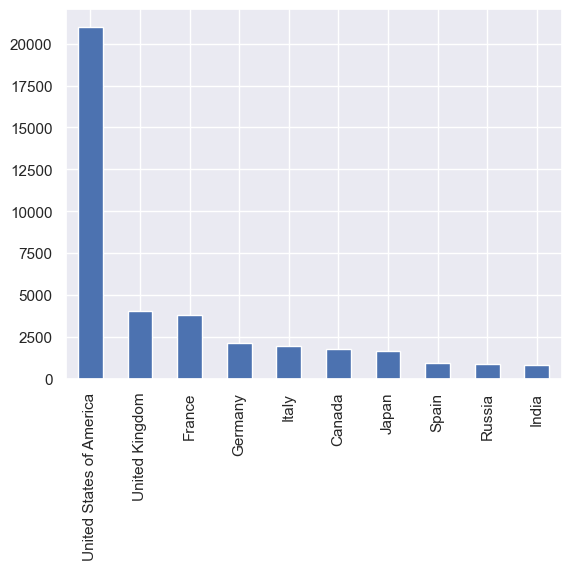

In [134]:
country=[]
for row in movies_df['production_countries_new']:
    for records in row:
        country.append(records)
        
country1=pd.Series(country).value_counts()
top_10_ctry=country1.head(10)

top_10_ctry.plot(kind='bar')

# Production company from U.S.A has produced most no of movies

# Genres

<AxesSubplot:>

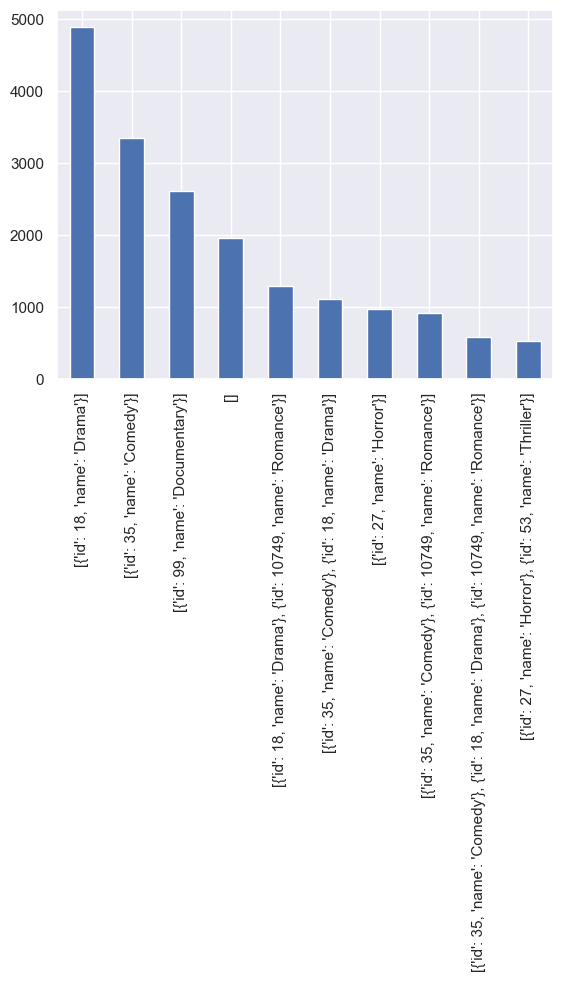

In [135]:
genres=[]

for row in movies_df['genres']:
    genres.append(row)
    
genre_list=pd.Series(genres).value_counts()

top_10_gen=genre_list.head(10)

top_10_gen.plot(kind='bar')

# Movie genre-drama has been watched most

In [136]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44048 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   adult                     44048 non-null  object        
 1   budget                    44048 non-null  float64       
 2   genres                    44048 non-null  object        
 3   id                        44048 non-null  object        
 4   imdb_id                   44048 non-null  object        
 5   original_language         44048 non-null  object        
 6   original_title            44048 non-null  object        
 7   overview                  44048 non-null  object        
 8   popularity                44048 non-null  float64       
 9   poster_path               44048 non-null  object        
 10  production_companies      44048 non-null  object        
 11  production_countries      44048 non-null  object        
 12  release_date      

In [137]:
movies_df1=movies_df[['id','original_title','overview']]

In [138]:
movies_df1

,id,original_title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45460,30840,Robin Hood,"Yet another version of the classic epic, with ..."
45462,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,227506,Satana likuyushchiy,"In a small town live two brothers, one a minis..."


# keywords dataset

In [139]:
movies_df1['id']=movies_df1['id'].astype('int64')

In [140]:
key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [141]:
movies_df1=movies_df1.merge(key_df,on='id')

In [142]:
movies_df1

,id,original_title,overview,keywords
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...
45008,30840,Robin Hood,"Yet another version of the classic epic, with ...",[]
45009,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
45010,67758,Betrayal,"When one of her hits goes wrong, a professiona...",[]
45011,227506,Satana likuyushchiy,"In a small town live two brothers, one a minis...",[]


# Rating dataset

In [143]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Merged all three datasets

In [144]:
final_df= ratings_df.merge(movies_df1, left_on='movieId',right_on='id', how='left')

In [145]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100034 entries, 0 to 100033
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userId          100034 non-null  int64  
 1   movieId         100034 non-null  int64  
 2   rating          100034 non-null  float64
 3   timestamp       100034 non-null  int64  
 4   id              44845 non-null   float64
 5   original_title  44845 non-null   object 
 6   overview        44845 non-null   object 
 7   keywords        44845 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.9+ MB


In [146]:
final_df.dropna(inplace=True)

In [147]:
final_null=(final_df.isnull().sum()/len(final_df))
final_null

userId            0.0
movieId           0.0
rating            0.0
timestamp         0.0
id                0.0
original_title    0.0
overview          0.0
keywords          0.0
dtype: float64

In [148]:
final_df.shape

(44845, 8)

In [149]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44845 entries, 10 to 100027
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId          44845 non-null  int64  
 1   movieId         44845 non-null  int64  
 2   rating          44845 non-null  float64
 3   timestamp       44845 non-null  int64  
 4   id              44845 non-null  float64
 5   original_title  44845 non-null  object 
 6   overview        44845 non-null  object 
 7   keywords        44845 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 3.1+ MB


In [150]:
final_df.duplicated().sum()

30

In [151]:
final_df=final_df[['userId','movieId','original_title','rating','overview']]
final_df

,userId,movieId,original_title,rating,overview
10,1,1371,Rocky III,2.5,"Now the world champion, Rocky Balboa is living..."
11,1,1405,Greed,1.0,Greed is the classic 1924 silent film by Erich...
13,1,2105,American Pie,4.0,"At a high-school party, four friends find that..."
15,1,2193,My Tutor,2.0,High school senior Bobby Chrystal fails his Fr...
16,1,2294,Jay and Silent Bob Strike Back,2.0,When Jay and Silent Bob learn that their comic...
...,...,...,...,...,...
100013,671,4995,Boogie Nights,4.0,"Set in 1977, back when sex was safe, pleasure ..."
100022,671,5816,Ober,4.0,"Edgar works as a waiter in 'Het Westen', a res..."
100023,671,5902,A Bridge Too Far,3.5,Tells the story of operation Market Garden. A ...
100026,671,5991,Der letzte Mann,4.5,"An aging doorman, after being fired from his p..."


In [152]:
final_df.reset_index()

,index,userId,movieId,original_title,rating,overview
0,10,1,1371,Rocky III,2.5,"Now the world champion, Rocky Balboa is living..."
1,11,1,1405,Greed,1.0,Greed is the classic 1924 silent film by Erich...
2,13,1,2105,American Pie,4.0,"At a high-school party, four friends find that..."
3,15,1,2193,My Tutor,2.0,High school senior Bobby Chrystal fails his Fr...
4,16,1,2294,Jay and Silent Bob Strike Back,2.0,When Jay and Silent Bob learn that their comic...
...,...,...,...,...,...,...
44840,100013,671,4995,Boogie Nights,4.0,"Set in 1977, back when sex was safe, pleasure ..."
44841,100022,671,5816,Ober,4.0,"Edgar works as a waiter in 'Het Westen', a res..."
44842,100023,671,5902,A Bridge Too Far,3.5,Tells the story of operation Market Garden. A ...
44843,100026,671,5991,Der letzte Mann,4.5,"An aging doorman, after being fired from his p..."


# Rating distribution

<AxesSubplot:>

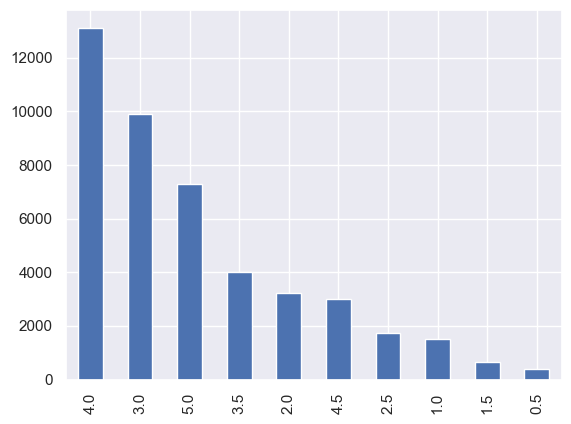

In [153]:
rating=final_df['rating'].value_counts()
rating.plot(kind='bar')

# Most no of movies has got 4 ratings

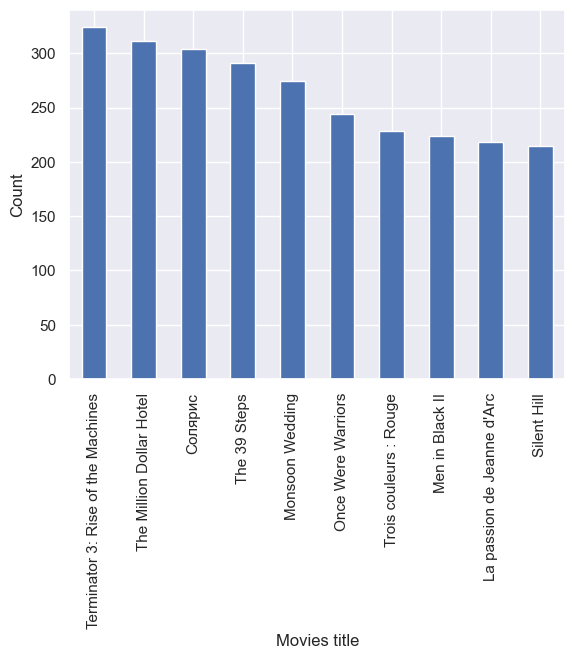

In [154]:
movie_count=final_df.groupby('original_title').count()['rating'].sort_values(ascending=False)
top_10_count=movie_count.head(10)
top_10_count.plot(kind='bar')
plt.xlabel('Movies title',)
plt.ylabel('Count')
plt.show()

In [155]:
movie_avg=final_df.groupby('original_title').mean()['rating'].sort_values(ascending=False)
movie_avg

original_title
The Pillow Book             5.0
The Specialist              5.0
Soldier of God              5.0
Gentlemen Prefer Blondes    5.0
A Streetcar Named Desire    5.0
                           ... 
Scandal Sheet               0.5
Off the Black               0.5
De zee die denkt            0.5
Finder's Fee                0.5
The Lost Valentine          0.5
Name: rating, Length: 2772, dtype: float64

Text(468.01587301587307, 0.5, 'No of ratings')

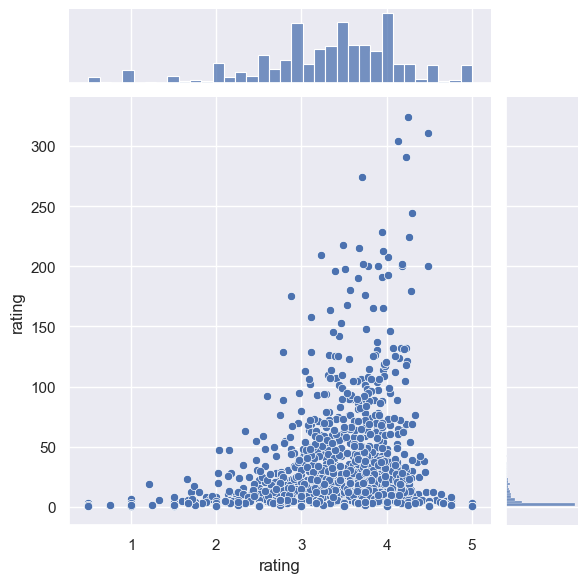

In [156]:
sns.jointplot(x=movie_avg,y=movie_count)
plt.xlabel('Average ratings')
plt.ylabel('No of ratings')

In [157]:
# for 

# Terminator 3 has got most no of ratings

# Model building

# content based model building using knn neighbours

In [158]:
table=final_df.pivot_table(columns='userId',index='original_title',values='rating').fillna(0)
table

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
original_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [159]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [160]:
matrix=csr_matrix(table.values)
matrix

<2772x671 sparse matrix of type '<class 'numpy.float64'>'
	with 44667 stored elements in Compressed Sparse Row format>

In [161]:
knn_model=NearestNeighbors(metric='cosine',algorithm='brute')
knn_model.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [162]:
query_index=np.random.choice(table.shape[0])
print(query_index)

885


In [163]:
distances,indices=knn_model.kneighbors(table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=10)
print(distances,indices)

[[2.22044605e-16 5.42799543e-01 6.02779644e-01 6.16046128e-01
  6.18999619e-01 6.18999619e-01 6.18999619e-01 6.18999619e-01
  6.18999619e-01 6.20631320e-01]] [[ 885 2496 1960 1634 2482 1922 1318 1092  841 2532]]


In [164]:
print(distances.flatten())

[2.22044605e-16 5.42799543e-01 6.02779644e-01 6.16046128e-01
 6.18999619e-01 6.18999619e-01 6.18999619e-01 6.18999619e-01
 6.18999619e-01 6.20631320e-01]


In [165]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(table.index[query_index]))
    else:
        print('{0}: {1} having distances {2}'.format(i, table.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Hable con ella:

1: Une vraie jeune fille having distances 0.5427995427993142
2: Så som i himmelen having distances 0.6027796440007179
3: Pirates of the Caribbean: The Curse of the Black Pearl having distances 0.6160461276738427
4: Un chien andalou having distances 0.6189996189994285
5: Starship Troopers having distances 0.6189996189994285
6: Lost Highway having distances 0.6189996189994285
7: K-PAX having distances 0.6189996189994285
8: Ghost having distances 0.6189996189994285
9: Vidas secas having distances 0.6206313197778462


# Finding similar users

In [166]:
table1=final_df.pivot_table(columns='original_title',index='userId',values='rating').fillna(0)
table1

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,13 Tzameti,1408,15 Minutes,16 Blocks,1724 기방난동사건,1942: A Love Story,1984,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,2061 - Un anno eccezionale,21 Grams,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,29th Street,2:37,3 Ninjas: High Noon at Mega Mountain,3 hommes et un couffin,300,33 sceny z życia,36 Fillette,"4 luni, 3 săptămîni și 2 zile",40 Days and 40 Nights,42nd Street,48 Hrs.,4: Rise of the Silver Surfer,5 Card Stud,5 Days of War,50 First Dates,54,5x2,69 - Sixtynine,7 vírgenes,8 Mile,8 femmes,88 Minutes,8:46,8½,9 Songs,95 Miles to Go,964 Pinocchio,99 francs,A Beautiful Mind,A Bridge Too Far,A Brief History of Time,A Canção de Lisboa,A Chorus Line,A Christmas Carol,A Christmas Story,A Clockwork Orange,A Close Shave,A Countess from Hong Kong,A Dandy in Aspic,A Dangerous Method,A Few Good Men,A Guide To Recognizing Your Saints,A Guide for the Married Man,A Hard Day's Night,A History of Violence,A Kiss Before Dying,"A Man, a Woman and a Bank",A Mighty Heart,A Máquina,A Night in Heaven,A Nightmare on Elm Street,A Perfect Murder,A Pyromaniac's Love Story,A River Runs Through It,A Scanner Darkly,A Shot in the Dark,A Star Is Born,A Streetcar Named Desire,A Tale of Two Cities,A Time for Killing,A Time to Kill,A View to a Kill,A2,Aamdani Atthanni Kharcha Rupaiya,Abel,About Schmidt,About a Boy,Abraham,Abre los ojos,Absolon,Absolute Giganten,Absolute Power,Across the Universe,Adams æbler,Adaptation.,Addams Family Values,Addicted to Love,Adieu l'ami,Adrenalin: Fear the Rush,Adventures Of A Taxi Driver,Ae Fond Kiss...,Affair in Havana,Age of Consent,"Aguirre, der Zorn Gottes",Ah ! Les belles bacchantes,"Air: Eating, Sleeping, Waiting and Playing",Airplane!,Aladin,Alamar,Alexander,Alice in den Städten,Alice's Restaurant,Alien,Aliens,Aliens vs Predator: Requiem,Alive,All About Eve,All the King's Men,All the President's Men,Alles auf Zucker!,Almost Famous,Along Came Polly,Along Came a Spider,Alraune,Alvin and the Chipmunks,Always Outnumbered,Am Ende Kommen Touristen,Amadeus,Amelia,American Beauty,American Graffiti,American Grindhouse,American History X,American Mullet,American Pie,American Pie 2,American Pie Presents: The Naked Mile,American Psycho,American Splendor,American Wedding,"Amico, stammi lontano almeno un palmo",Amores perros,Amos & Andrew,Amsterdamned,An American Tail,An American in Paris,An Angel at My Table,An Ideal Husband,An Unfinished Life,Ana y los otros,Anatomie de l'enfer,Anatomy of a Murder,Anchorman: The Legend of Ron Burgundy,And Then There Were None,And the Band Played On,"André Hazes, Zij Gelooft in Mij",Angel Baby,Angel Face,Angel Heart,Angels and Insects,Angst essen Seele auf,Angustia,Anima Mundi,Anma to onna,Anne of the Indies,Annie Hall,Annie's Point,Antikörper,Antoine et Colette,Antonia,Antz,Apartment Zero,Apocalypse Now,Apollo 13,Appointment with Death,Arctic Tale,Arena,Ariel,Arlington Road,Armageddon,Armed and Dangerous,Army of Darkness,Around the World in Eighty Days,Arthur et la vengeance de Maltazard,As Good as It Gets,Ascenseur pour l'échafaud,Ask the Dust,Astérix & Obélix Mission Cléopâtre,Astérix aux Jeux Olympiques,Asylum,At Long Last Love,At Risk,Atlantis: Milo's Return,Atonement,Attack of the Killer Tomatoes!,Auf der anderen Seite,Austin High,Austin Powers in Goldmember,Austin Powers: International Man of Mystery,Avalon,Away from Her,Azuloscurocasinegro,B. Monkey,Babel,Babes in Toyland,Babysitter Wanted,Baciami Ancora,Back to the Future,Back to the Future Part II,Back to the Future Part III,Backdraft,Bad Boys II,Bad Girls Go to Hell,Badlands,Baise-moi,Baisers volés,Ballo a tre passi,Bambi Meets Godzilla,Bandidas,Bandido!,Bandyta,Bang Boom Bang - Ein todsicheres Ding,Barda,Barfuß,Barking Water,Barocco,Barry Lyndon,B

In [167]:
matrix_norm=table1.subtract(table1.mean(axis=1),axis='rows')
matrix_norm

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,12 Angry Men,13 Tzameti,1408,15 Minutes,16 Blocks,1724 기방난동사건,1942: A Love Story,1984,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,2061 - Un anno eccezionale,21 Grams,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,29th Street,2:37,3 Ninjas: High Noon at Mega Mountain,3 hommes et un couffin,300,33 sceny z życia,36 Fillette,"4 luni, 3 săptămîni și 2 zile",40 Days and 40 Nights,42nd Street,48 Hrs.,4: Rise of the Silver Surfer,5 Card Stud,5 Days of War,50 First Dates,54,5x2,69 - Sixtynine,7 vírgenes,8 Mile,8 femmes,88 Minutes,8:46,8½,9 Songs,95 Miles to Go,964 Pinocchio,99 francs,A Beautiful Mind,A Bridge Too Far,A Brief History of Time,A Canção de Lisboa,A Chorus Line,A Christmas Carol,A Christmas Story,A Clockwork Orange,A Close Shave,A Countess from Hong Kong,A Dandy in Aspic,A Dangerous Method,A Few Good Men,A Guide To Recognizing Your Saints,A Guide for the Married Man,A Hard Day's Night,A History of Violence,A Kiss Before Dying,"A Man, a Woman and a Bank",A Mighty Heart,A Máquina,A Night in Heaven,A Nightmare on Elm Street,A Perfect Murder,A Pyromaniac's Love Story,A River Runs Through It,A Scanner Darkly,A Shot in the Dark,A Star Is Born,A Streetcar Named Desire,A Tale of Two Cities,A Time for Killing,A Time to Kill,A View to a Kill,A2,Aamdani Atthanni Kharcha Rupaiya,Abel,About Schmidt,About a Boy,Abraham,Abre los ojos,Absolon,Absolute Giganten,Absolute Power,Across the Universe,Adams æbler,Adaptation.,Addams Family Values,Addicted to Love,Adieu l'ami,Adrenalin: Fear the Rush,Adventures Of A Taxi Driver,Ae Fond Kiss...,Affair in Havana,Age of Consent,"Aguirre, der Zorn Gottes",Ah ! Les belles bacchantes,"Air: Eating, Sleeping, Waiting and Playing",Airplane!,Aladin,Alamar,Alexander,Alice in den Städten,Alice's Restaurant,Alien,Aliens,Aliens vs Predator: Requiem,Alive,All About Eve,All the King's Men,All the President's Men,Alles auf Zucker!,Almost Famous,Along Came Polly,Along Came a Spider,Alraune,Alvin and the Chipmunks,Always Outnumbered,Am Ende Kommen Touristen,Amadeus,Amelia,American Beauty,American Graffiti,American Grindhouse,American History X,American Mullet,American Pie,American Pie 2,American Pie Presents: The Naked Mile,American Psycho,American Splendor,American Wedding,"Amico, stammi lontano almeno un palmo",Amores perros,Amos & Andrew,Amsterdamned,An American Tail,An American in Paris,An Angel at My Table,An Ideal Husband,An Unfinished Life,Ana y los otros,Anatomie de l'enfer,Anatomy of a Murder,Anchorman: The Legend of Ron Burgundy,And Then There Were None,And the Band Played On,"André Hazes, Zij Gelooft in Mij",Angel Baby,Angel Face,Angel Heart,Angels and Insects,Angst essen Seele auf,Angustia,Anima Mundi,Anma to onna,Anne of the Indies,Annie Hall,Annie's Point,Antikörper,Antoine et Colette,Antonia,Antz,Apartment Zero,Apocalypse Now,Apollo 13,Appointment with Death,Arctic Tale,Arena,Ariel,Arlington Road,Armageddon,Armed and Dangerous,Army of Darkness,Around the World in Eighty Days,Arthur et la vengeance de Maltazard,As Good as It Gets,Ascenseur pour l'échafaud,Ask the Dust,Astérix & Obélix Mission Cléopâtre,Astérix aux Jeux Olympiques,Asylum,At Long Last Love,At Risk,Atlantis: Milo's Return,Atonement,Attack of the Killer Tomatoes!,Auf der anderen Seite,Austin High,Austin Powers in Goldmember,Austin Powers: International Man of Mystery,Avalon,Away from Her,Azuloscurocasinegro,B. Monkey,Babel,Babes in Toyland,Babysitter Wanted,Baciami Ancora,Back to the Future,Back to the Future Part II,Back to the Future Part III,Backdraft,Bad Boys II,Bad Girls Go to Hell,Badlands,Baise-moi,Baisers volés,Ballo a tre passi,Bambi Meets Godzilla,Bandidas,Bandido!,Bandyta,Bang Boom Bang - Ein todsicheres Ding,Barda,Barfuß,Barking Water,Barocco,Barry Lyndon,B

In [168]:
# User similarity matrix using Pearson correlation
user_similarity = table1.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.006145,-0.004059,0.105330,0.039799,-0.004141,0.081789,-0.005549,0.028841,-0.003688,-0.002742,-0.003146,-0.004019,-0.002004,0.059827,-0.002969,0.026245,-0.004946,0.026460,-0.005492,0.032226,0.017346,-0.015099,-0.003159,0.027461,0.002860,-0.003073,-0.004638,-0.001922,0.013059,-0.004427,-0.005101,0.021370,0.064101,0.219907,-0.007270,-0.002788,-0.004966,-0.005824,-0.002856,0.160224,-0.004184,0.046511,-0.003574,-0.002401,-0.002742,-0.004532,0.035446,0.072914,-0.004823,-0.003077,-0.003527,-0.003796,-0.002082,-0.004240,-0.010470,0.029442,-0.004420,0.034809,-0.004361,-0.007231,-0.003140,-0.005213,-0.003615,-0.002547,0.056335,-0.007015,-0.006276,-0.005377,-0.006560,-0.002324,-0.006429,0.068948,-0.004190,0.058341,-0.002312,0.058559,0.027600,-0.004051,-0.004073,-0.006106,-0.004409,-0.006731,-0.004671,-0.007101,-0.009844,0.017869,-0.009285,-0.004726,-0.004587,-0.005335,-0.007469,-0.007345,-0.007214,0.137856,-0.004236,-0.005759,0.035779,-0.008099,-0.003445,-0.004211,0.056058,-0.004980,-0.003873,0.036345,-0.003448,-0.002778,-0.003892,-0.003383,-0.007864,-0.010396,-0.002898,-0.003875,-0.003668,-0.004139,-0.002864,-0.003661,0.069575,0.058813,-0.006474,-0.006623,-0.004671,-0.003239,-0.004752,-0.007761,-0.005713,-0.003265,-0.010134,-0.002068,0.123606,-0.002919,-0.004748,-0.005734,-0.009833,-0.003293,-0.004131,-0.005116,-0.004000,-0.003970,-0.003497,-0.002402,-0.003817,-0.005101,-0.004542,-0.004520,-0.004545,-0.003998,-0.006510,-0.007031,0.042755,-0.005677,-0.007512,-0.003961,0.031363,0.082265,-0.003218,0.041749,-0.002529,-0.007251,-0.005423,-0.006912,-0.003777,-0.004

In [169]:
from sklearn.metrics.pairwise import cosine_similarity

In [170]:
# User similarity matrix using Pearson correlation
user_similarity_cosine = cosine_similarity(table1.fillna(0))
user_similarity_cosine

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.17289957, ..., 0.04433851, 0.17307257,
        0.11019551],
       [0.        , 0.17289957, 1.        , ..., 0.10607371, 0.22474113,
        0.20842071],
       ...,
       [0.        , 0.04433851, 0.10607371, ..., 1.        , 0.        ,
        0.12383614],
       [0.        , 0.17307257, 0.22474113, ..., 0.        , 1.        ,
        0.20232887],
       [0.        , 0.11019551, 0.20842071, ..., 0.12383614, 0.20232887,
        1.        ]])

In [171]:
picked_user=np.random.choice(table1.index)
user_similarity.drop(index=picked_user,inplace=True)
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.006145,-0.004059,0.105330,0.039799,-0.004141,0.081789,-0.005549,0.028841,-0.003688,-0.002742,-0.003146,-0.004019,-0.002004,0.059827,-0.002969,0.026245,-0.004946,0.026460,-0.005492,0.032226,0.017346,-0.015099,-0.003159,0.027461,0.002860,-0.003073,-0.004638,-0.001922,0.013059,-0.004427,-0.005101,0.021370,0.064101,0.219907,-0.007270,-0.002788,-0.004966,-0.005824,-0.002856,0.160224,-0.004184,0.046511,-0.003574,-0.002401,-0.002742,-0.004532,0.035446,0.072914,-0.004823,-0.003077,-0.003527,-0.003796,-0.002082,-0.004240,-0.010470,0.029442,-0.004420,0.034809,-0.004361,-0.007231,-0.003140,-0.005213,-0.003615,-0.002547,0.056335,-0.007015,-0.006276,-0.005377,-0.006560,-0.002324,-0.006429,0.068948,-0.004190,0.058341,-0.002312,0.058559,0.027600,-0.004051,-0.004073,-0.006106,-0.004409,-0.006731,-0.004671,-0.007101,-0.009844,0.017869,-0.009285,-0.004726,-0.004587,-0.005335,-0.007469,-0.007345,-0.007214,0.137856,-0.004236,-0.005759,0.035779,-0.008099,-0.003445,-0.004211,0.056058,-0.004980,-0.003873,0.036345,-0.003448,-0.002778,-0.003892,-0.003383,-0.007864,-0.010396,-0.002898,-0.003875,-0.003668,-0.004139,-0.002864,-0.003661,0.069575,0.058813,-0.006474,-0.006623,-0.004671,-0.003239,-0.004752,-0.007761,-0.005713,-0.003265,-0.010134,-0.002068,0.123606,-0.002919,-0.004748,-0.005734,-0.009833,-0.003293,-0.004131,-0.005116,-0.004000,-0.003970,-0.003497,-0.002402,-0.003817,-0.005101,-0.004542,-0.004520,-0.004545,-0.003998,-0.006510,-0.007031,0.042755,-0.005677,-0.007512,-0.003961,0.031363,0.082265,-0.003218,0.041749,-0.002529,-0.007251,-0.005423,-0.006912,-0.003777,-0.004

In [172]:
n=10

user_threshold=0.3

similar_users=user_similarity[user_similarity[picked_user]>user_threshold][picked_user].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_user} are', similar_users)

The similar users for user 626 are userId
476    0.334791
123    0.328981
189    0.310473
51     0.300146
Name: 626, dtype: float64


In [173]:
# Movies that target user watched. Remove movies that none of the similar users have watched
picked_userid_watched=matrix_norm[matrix_norm==picked_user].dropna(axis=1,how='all')

In [174]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_users_watched=matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1,how='all')

In [175]:
similar_users_watched.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

In [176]:
similar_users_watched.columns

Index(['!Women Art Revolution', ''Gator Bait',
       ''Twas the Night Before Christmas', '...Più forte ragazzi!',
       '00 Schneider - Jagd auf Nihil Baxter', '10 Items or Less',
       '10 Things I Hate About You', '10,000 BC', '11'09''01 - September 11',
       '12 + 1',
       ...
       '사마리아', '야수', '연가시', '오직 그대만', '올드보이', '장화, 홍련', '최종병기 활', '친절한 금자씨',
       '해안선', '활'],
      dtype='object', name='original_title', length=2772)

# User Based Recommendation

In [177]:
table

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
original_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [178]:
# User similarity matrix using Pearson correlation
user_similarity_cosine = cosine_similarity(table)
user_similarity_cosine

array([[1.        , 0.        , 0.51370361, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51370361, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.27946777],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27946777,
        1.        ]])

In [179]:
table.index

Index(['!Women Art Revolution', ''Gator Bait',
       ''Twas the Night Before Christmas', '...Più forte ragazzi!',
       '00 Schneider - Jagd auf Nihil Baxter', '10 Items or Less',
       '10 Things I Hate About You', '10,000 BC', '11'09''01 - September 11',
       '12 + 1',
       ...
       '사마리아', '야수', '연가시', '오직 그대만', '올드보이', '장화, 홍련', '최종병기 활', '친절한 금자씨',
       '해안선', '활'],
      dtype='object', name='original_title', length=2772)

In [182]:
np.where(table.index=='10,000 BC')[0][0]

7

In [183]:
def recommend(movie_name):
    index=np.where(table.index==movie_name)[0][0]
    
    similar_books=sorted(list(enumerate(user_similarity[index])),key=lambda x:x[1],reverse=True)[:11]
    
    for i in similar_books:
        print(table.index[i[0]])

In [184]:
recommend('10,000 BC')

10 Things I Hate About You
Carolina
Die Nibelungen, Teil 1: Siegfried
Donnie Darko
Barton Fink
David Copperfield
Canvas
2001: A Space Odyssey
China Gate
Buck Rogers in the 25th Century
Arlington Road
